#  Satellite imagery access and analysis in Python & Jupyter notebooks

## Accessing data
In this jupyter notebook, we will use Sentinel 2 data. There are many options to access Sentinel 2 images and most of them will require you to access through website interaction whether directly via a downloading service utility or via the cloud. However, since we are using Jupyter notebook, we will access them right here using, sentinelsat a python library which makes searching, retrieving and downloading Sentinel satellite images easy. So let us start installing sentinelsat through pip.

In [ ]:
pip install sentinelsat

### Before we are able to use sentinelsat, we need to register a username in Copernicus Open Access Hub and note down your username and password and paste them here inside the code.

In [2]:
from sentinelsat import SentinelAPI

user = 'muhammadnassermoul' 
password = 'Casedepart1994' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [3]:
import geopandas as gpd
import folium 

### With the code below, we have read natural reserve shapefile in Geopandas and called it nReserve, then later created an empty base map in Folium centred around coordinates in the area, we call this m. Finally, we can add the Geopandas data to the base map we have created to visualize the Natural Reserve boundary we are interested in. Below you can see the map.

In [13]:


nReserve = gpd.read_file('C:/Users/Jean Paul/Downloads/download (1)/layers/POLYGON.shp')

m = folium.Map([-18.6696553 ,35.5273354], zoom_start=12)
folium.GeoJson(nReserve).add_to(m)
m

#### One last step before we can search and download sentinel 2 images is to create a footprint from the nReservegeometry. Here we will use Shapely Python library since our data is in Shapefiles and have read it already as Geopandas GeodataFrame. (Note that if you have Geojson data, sentinelsatprovides a handy way to convert your data into a proper format in the query).

In [14]:
from shapely.geometry import MultiPolygon, Polygon

footprint = None
for i in nReserve['geometry']:
    footprint = i

### we will create a query for Sentinel 2 images Level 2A with cloud coverage between 0 and 10 that fall or intersect with the footprint (Area of study). For the time period, we are interested only in Sentinel Level 2A satellite images taken between ‘20190901’ and ‘20200301’

In [15]:
products = api.query(footprint,
                     date = ('20190901', '20200301'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10)
                    )

### We get a dictionary of all products available in this period with the query specification.From here we can create a GeodataFrame or Dataframe from the product dictionary and sort them according to cloud coverage percentage. I prefer GeodataFrame instead of plain dataframe as the first holds the geometry of each satellite image tile. Once we create the GeodataFrame and sort it. As we do not have many products here we call directly products_gdf_sorted table to see the attributes off all  rows.

In [16]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
4491b1e1-6b2f-4c28-a5ef-c80110ed0c30,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-07T07:30:19.024Z, Instrument: MS...",false,2019-11-07 07:30:19.024,2019-11-07 07:30:19.024,2019-11-07 17:15:42.469,13946,...,02.13,Level-2A,S2MSI2A,Sentinel-2,676.47 MB,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXE_2...,S2B_OPER_MSI_L1C_TL_MTI__20191107T094402_A0139...,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXE_2...,4491b1e1-6b2f-4c28-a5ef-c80110ed0c30,"MULTIPOLYGON (((34.29524 -19.07571, 34.99387 -..."
09448b0e-3064-48ac-822f-b5d26fc726ae,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-07T07:30:19.024Z, Instrument: MS...",false,2019-11-07 07:30:19.024,2019-11-07 07:30:19.024,2019-11-07 17:10:58.303,13946,...,02.13,Level-2A,S2MSI2A,Sentinel-2,410.50 MB,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXF_2...,S2B_OPER_MSI_L1C_TL_MTI__20191107T094402_A0139...,S2B_MSIL2A_20191107T073019_N0213_R049_T36KXF_2...,09448b0e-3064-48ac-822f-b5d26fc726ae,"MULTIPOLYGON (((34.51851 -18.17023, 34.98336 -..."
8d5732b7-7494-4062-a995-a2b7c474be54,S2A_MSIL2A_20190913T072611_N0213_R049_T36KXE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-13T07:26:11.024Z, Instrument: MS...",false,2019-09-13 07:26:11.024,2019-09-13 07:26:11.024,2019-09-13 23:22:10.742,22068,...,02.13,Level-2A,S2MSI2A,Sentinel-2,652.45 MB,S2A_MSIL2A_20190913T072611_N0213_R049_T36KXE_2...,S2A_OPER_MSI_L1C_TL_MTI__20190913T094142_A0220...,S2A_MSIL2A_20190913T072611_N0213_R049_T36KXE_2...,8d5732b7-7494-4062-a995-a2b7c474be54,"MULTIPOLYGON (((34.28894 -19.07576, 34.99387 -..."
2765a4d3-188a-45ee-95ba-2416d34d5651,S2B_MSIL2A_20190928T072659_N0213_R049_T36KXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-28T07:26:59.024Z, Instrument: MS...",false,2019-09-28 07:26:59.024,2019-09-28 07:26:59.024,2019-09-28 17:13:53.886,13374,...,02.13,Level-2A,S2MSI2A,Sentinel-2,393.36 MB,S2B_MSIL2A_20190928T072659_N0213_R049_T36KXF_2...,S2B_OPER_MSI_L1C_TL_SGS__20190928T111030_A0133...,S2B_MSIL2A_20190928T072659_N0213_R049_T36KXF_2...,2765a4d3-188a-45ee-95ba-2416d34d5651,"MULTIPOLYGON (((34.51941 -18.17022, 34.98336 -..."
6db7bce9-030c-4e99-83ed-12e62a66fb22,S2B_MSIL2A_20191008T072759_N0213_R049_T36KXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-10-08T07:27:59.024Z, Instrument: MS...",false,2019-10-08 07:27:59.024,2019-10-08 07:27:59.024,2019-10-08 18:34:40.428,13517,...,02.13,Level-2A,S2MSI2A,Sentinel-2,394.78 MB,S2B_MSIL2A_20191008T072759_N0213_R049_T36KXF_2...,S2B_OPER_MSI_L1C_TL_EPAE_20191008T102349_A0135...,S2B_MSIL2A_20191008T072759_N0213_R049_T36KXF_2...,6db7bce9-030c-4e99-83ed-12e62a66fb22,"MULTIPOLYGON (((34.51752 -18.17024, 34.98336 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6cf660e4-4bce-4e61-b62d-568057f737a5,S2B_MSIL2A_20191227T073229_N0213_R049_T36KXD_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-12-27T07:32:29.024Z, Instrument: MS...",false,2019-12-27 07:32:29.024,2019-12-27 07:32:29.024,2019-12-28 07:12:26.829,14661,...,02.

In [17]:
print(len(products))

84


<AxesSubplot:>

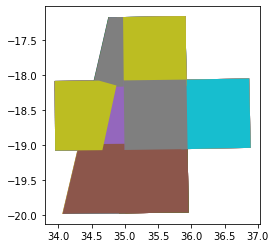

In [18]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)


In [19]:
areas.uuid

5726be95-a9f4-4595-8e56-75dd8ec24bed    5726be95-a9f4-4595-8e56-75dd8ec24bed
97b80779-46d2-4471-b9b1-467cfb647c93    97b80779-46d2-4471-b9b1-467cfb647c93
facd51b1-1693-4150-99e9-2bc668c20b60    facd51b1-1693-4150-99e9-2bc668c20b60
d0459fbf-3aaf-48e5-b578-640434b63011    d0459fbf-3aaf-48e5-b578-640434b63011
f12381ec-17f7-4226-8845-cd2d28bb0102    f12381ec-17f7-4226-8845-cd2d28bb0102
                                                        ...                 
cd44579e-8dd4-4ac6-864a-e3a45063b246    cd44579e-8dd4-4ac6-864a-e3a45063b246
8d5732b7-7494-4062-a995-a2b7c474be54    8d5732b7-7494-4062-a995-a2b7c474be54
ca684717-adfb-4638-be4b-2f272c869a76    ca684717-adfb-4638-be4b-2f272c869a76
a3339bb7-702b-42d8-9f11-e2a74c9a4882    a3339bb7-702b-42d8-9f11-e2a74c9a4882
d424b1f6-4c1c-4e98-8651-18cb99d66e66    d424b1f6-4c1c-4e98-8651-18cb99d66e66
Name: uuid, Length: 84, dtype: object

###  we can simply call download and provide the product name (Note that you can download all images at once with api.download_all() function).

In [20]:
api.get_product_odata('facd51b1-1693-4150-99e9-2bc668c20b60')

{'id': 'facd51b1-1693-4150-99e9-2bc668c20b60',
 'title': 'S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331',
 'size': 977890391,
 'md5': '025c89604ea43cee3c0ca269a8f2eba9',
 'date': datetime.datetime(2020, 2, 18, 7, 39, 49, 24000),
 'footprint': 'POLYGON((34.88769265677291 -18.079063562094515,34.883458424593066 -18.09776651596161,34.85878283319219 -18.20647674000629,34.849511559091326 -18.24722808862759,34.81568283893459 -18.395600890977864,34.808912051293035 -18.425220924741016,34.78196915227325 -18.542842824879525,34.74803080722227 -18.69112110035968,34.71412731544365 -18.83934064271824,34.68018552822748 -18.987505676870743,34.66069545188019 -19.072788315684498,33.950531626201396 -19.078459430248184,33.94504598188942 -18.086213891930853,34.88769265677291 -18.079063562094515))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('facd51b1-1693-4150-99e9-2bc668c20b60')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 2, 18, 16, 53, 18, 184000),


In [21]:
api.download('facd51b1-1693-4150-99e9-2bc668c20b60')

MD5 checksumming:   0%|          | 0.00/978M [00:00<?, ?B/s]

{'id': 'facd51b1-1693-4150-99e9-2bc668c20b60',
 'title': 'S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331',
 'size': 977890391,
 'md5': '025c89604ea43cee3c0ca269a8f2eba9',
 'date': datetime.datetime(2020, 2, 18, 7, 39, 49, 24000),
 'footprint': 'POLYGON((34.88769265677291 -18.079063562094515,34.883458424593066 -18.09776651596161,34.85878283319219 -18.20647674000629,34.849511559091326 -18.24722808862759,34.81568283893459 -18.395600890977864,34.808912051293035 -18.425220924741016,34.78196915227325 -18.542842824879525,34.74803080722227 -18.69112110035968,34.71412731544365 -18.83934064271824,34.68018552822748 -18.987505676870743,34.66069545188019 -19.072788315684498,33.950531626201396 -19.078459430248184,33.94504598188942 -18.086213891930853,34.88769265677291 -18.079063562094515))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('facd51b1-1693-4150-99e9-2bc668c20b60')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 2, 18, 16, 53, 18, 184000),


# Exploring Satellite Imagery with Rasterio
Once we unzip the downloaded folder, we get many subfolders and it is sometimes hard to navigate through these folders. Here is a tree of the folders.

In [34]:
import rasterio as rio
import zipfile
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
from rasterio import mask as msk

# Create RGB Image
The true colour of satellite images is often displayed in a combination of the red, green and blue bands. Let us first read the data with Rasterio and create an RGB image from Bands 4, 3, and 2.

In [24]:
# Open Bands 4, 3 and 2 with Rasterio
R10 = 'S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_20190605T143319.SAFE/GRANULE/L2A_T33TTG_A011731_20190605T100530/IMG_DATA/R10m'
b4 = rio.open('C:/Users/Jean Paul/Downloads/My directory/S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331.SAFE/GRANULE/L2A_T36KXE_A015419_20200218T080224/IMG_DATA/R10m/T36KXE_20200218T073949_B04_10m.jp2')
b3 = rio.open('C:/Users/Jean Paul/Downloads/My directory/S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331.SAFE/GRANULE/L2A_T36KXE_A015419_20200218T080224/IMG_DATA/R10m/T36KXE_20200218T073949_B03_10m.jp2')
b2 = rio.open('C:/Users/Jean Paul/Downloads/My directory/S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331.SAFE/GRANULE/L2A_T36KXE_A015419_20200218T080224/IMG_DATA/R10m/T36KXE_20200218T073949_B02_10m.jp2')
b8 = rio.open('C:/Users/Jean Paul/Downloads/My directory/S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331.SAFE/GRANULE/L2A_T36KXE_A015419_20200218T080224/IMG_DATA/R10m/T36KXE_20200218T073949_B02_10m.jp2')

# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=4,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.write(b8.read(1),4)
    rgb.close()

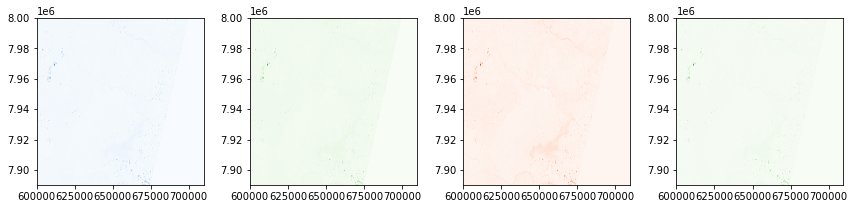

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= (12,4))
plot.show(b2, ax=ax1, cmap= 'Blues')
plot.show(b3, ax=ax2, cmap='Greens')
plot.show(b4, ax=ax3, cmap='Reds')
plot.show(b8, ax=ax4, cmap='Greens')
fig.tight_layout()

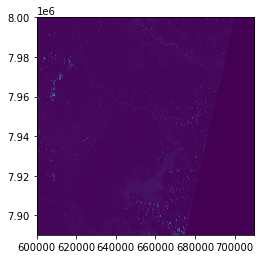

<AxesSubplot:>

In [48]:
src = rio.open('C:/Users/Jean Paul/Downloads/My directory/RGB.tiff', count=3)
plot.show(src)

# Clip Satellite images
One important preprocessing task to clip or mask an area of study. Since this RGB image is large and huge you save both computing power and time to clip and use only the area of interest. We will clip the Natural reserve area from the RGB image.

In [51]:
nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})

with rio.open("RGB.tiff") as src:
    out_image, out_transform = msk.mask(src, nReserve_proj.geometry,invert=True)
    #out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

# Create NDVI
Calculating Normalized Difference Vegetation Index (NDVI) is an important indicator to assess the presence/absence of green vegetation from the satellite images. To calculate the NDVI, you need Red band and Near-Infrared Band (NIR). Different satellite images assign different numbers for these bands. Sentinel Images have red in 4th band and NIR in the 8th band. The formula for NDVI calculation is:\\
nir - red /(nir + red)
To carry out this in Rasterio we need first to read the 4th and 8th bands as arrays. We also need to make sure that the arrays are floats.

In [55]:
# Open b4 and b8
b4 = rio.open('C:/Users/Jean Paul/Downloads/My directory/S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331.SAFE/GRANULE/L2A_T36KXE_A015419_20200218T080224/IMG_DATA/R10m/T36KXE_20200218T073949_B04_10m.jp2')
b8 = rio.open('C:/Users/Jean Paul/Downloads/My directory/S2B_MSIL2A_20200218T073949_N0214_R092_T36KXE_20200218T111331.SAFE/GRANULE/L2A_T36KXE_A015419_20200218T080224/IMG_DATA/R10m/T36KXE_20200218T073949_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))

C:\Users\JEANPA~1\AppData\Local\Temp/ipykernel_9068/4018067432.py:10: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir.astype(float)-red.astype(float))/(nir+red)


In [58]:
!pip install georaster

  Created wheel for georaster: filename=georaster-1.25-py3-none-any.whl size=15110 sha256=61fc62bc105b4b08de6ef4c54255714df2ce308187aef0c910f79fec7d516fe4
  Stored in directory: c:\users\jean paul\appdata\local\pip\cache\wheels\db\5d\ad\79efd20d62a0d1d229043a16a39042399baf759e19e9e9a358
Successfully built georaster


In [60]:
import georaster

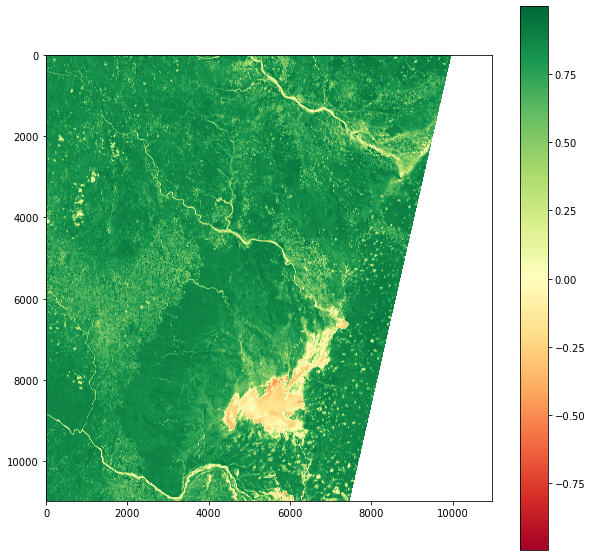

In [62]:
img = georaster.SingleBandRaster('C:/Users/Jean Paul/Downloads/My directory/NDVI.tif')

plt.figure(figsize = (10,10))
plt.imshow(img.r,cmap = 'RdYlGn')
plt.colorbar()

# Sentinel-2 image clustering in python

In [63]:
conda install -c anaconda scikit-learn


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: scikit-learn
